Akbar
Submission 1 NLP

In [1]:
# Menginstal package kaggle
!pip install -q kaggle

In [2]:
from google.colab import files

# Mengupload file json dari profile kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akbartolandy","key":"52c6001a3de19543a368743e284fa79b"}'}

In [3]:
# Membuat direktory dan mengubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# Mendownload dataset
!kaggle datasets download -d ritresearch/happydb

  0% 0.00/4.99M [00:00<?, ?B/s]
100% 4.99M/4.99M [00:00<00:00, 82.1MB/s]


In [5]:
# Ekstrak file zip dan melihat isi dataset
!mkdir happydb
!unzip happydb.zip -d happydb
!ls happydb

Archive:  happydb.zip
  inflating: happydb/cleaned_hm.csv  
  inflating: happydb/demographic.csv  
cleaned_hm.csv	demographic.csv


In [6]:
import pandas as pd

# Mengubah dataset menjadi dataframe
df = pd.read_csv('happydb/cleaned_hm.csv')

In [7]:
df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [8]:
# Melihat isi total dari data
df.shape

(100535, 9)

In [9]:
# Mengecek nilai null
df.isnull().sum()

hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_truth_category    86410
predicted_category           0
dtype: int64

In [10]:
# Melihat isi data klasifikasi kategori
df.predicted_category.value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

In [11]:
# Menggabungkan data class bonding, leisure, nature, exercise ke dalam enjoy_the_moment
for i in range(0,len(df)):
  if(df['predicted_category'][i]=='bonding'):
        df['predicted_category'][i]='enjoy_the_moment'
  elif(df['predicted_category'][i]=='leisure'):
        df['predicted_category'][i]='enjoy_the_moment'
  elif(df['predicted_category'][i]=='nature'):
        df['predicted_category'][i]='enjoy_the_moment'
  elif(df['predicted_category'][i]=='exercise'):
        df['predicted_category'][i]='enjoy_the_moment'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/py

In [12]:
df.predicted_category.value_counts()

affection           34168
achievement         33993
enjoy_the_moment    32374
Name: predicted_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


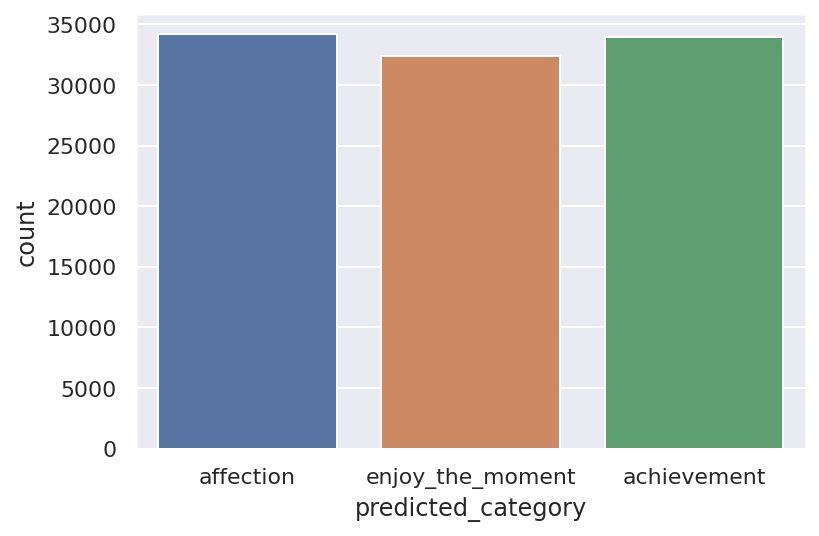

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

# visualisasi data class dari kategori
sns.countplot(df.predicted_category)
plt.show()

In [14]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['hmid',	'wid',	'reflection_period',
                      'original_hm', 'modified',	
                      'num_sentence', 'ground_truth_category'])

In [15]:
# Melakukan proses one hot encoding pada kategori
category = pd.get_dummies(df.predicted_category)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='predicted_category')
new_df

,cleaned_hm,achievement,affection,enjoy_the_moment
0,I went on a successful date with someone I fel...,0,1,0
1,I was happy when my son got 90% marks in his e...,0,1,0
2,I went to the gym this morning and did yoga.,0,0,1
3,We had a serious talk with some friends of our...,0,0,1
4,I went with grandchildren to butterfly display...,0,1,0
...,...,...,...,...
100530,My husband announced he is getting a decent bo...,0,1,0
100531,Had a can of Pepsi to drink.,0,0,1
100532,Cuddling with my girlfriend last night.,0,1,0
100533,I had a great meeting yesterday at work with m...,0,0,1


In [16]:
# Menghapus kolom yang tidak di perlukan
hm = new_df['cleaned_hm'].values
sentiment = new_df[[
                 'achievement', 
                 'affection',
                 'enjoy_the_moment']].values
df

,cleaned_hm,predicted_category
0,I went on a successful date with someone I fel...,affection
1,I was happy when my son got 90% marks in his e...,affection
2,I went to the gym this morning and did yoga.,enjoy_the_moment
3,We had a serious talk with some friends of our...,enjoy_the_moment
4,I went with grandchildren to butterfly display...,affection
...,...,...
100530,My husband announced he is getting a decent bo...,affection
100531,Had a can of Pepsi to drink.,enjoy_the_moment
100532,Cuddling with my girlfriend last night.,affection
100533,I had a great meeting yesterday at work with m...,enjoy_the_moment


In [17]:
# Mengecek isi text dari cleaned_hm
hm

array(['I went on a successful date with someone I felt sympathy and connection with.',
       'I was happy when my son got 90% marks in his examination ',
       'I went to the gym this morning and did yoga.', ...,
       'Cuddling with my girlfriend last night.',
       "I had a great meeting yesterday at work with my boss and a few colleagues and we went out for lunch afterward; everybody was excited by the projects we're working on and how efficient our team is.",
       'I had a great workout last night.'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi train dan test
X_train, X_test, Y_train, Y_test = train_test_split(hm, category, test_size=0.2)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_word=10000

tokenizer = Tokenizer(num_words=num_word, lower=True, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequences_train, maxlen=200, truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=200, truncating='post')

In [20]:
import tensorflow as tf

# Membuat arsitektur CNN dengan Keras
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_word, output_dim=16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile model menggunakan adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

# Mengurangi kecepatan pelatihan per 5 epoch
def scheduler(epoch, lr):
  if epoch != 0 and epoch % 5 == 0:
    return lr * 0.2
  else:
    return lr

reduce_lr = LearningRateScheduler(scheduler, verbose=1)

# Menghentikan proses pelatihan apabila tidak terjadi perubahan setelah 3 epoch
early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

# Membuat custom callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print('\naccuracy and val_accuracy > 90%!')
      self.model.stop_training = True

cust_callbacks = myCallback()

callbacks_list = [reduce_lr, early_stop, cust_callbacks]

In [22]:
hist = model.fit(padded_train, Y_train, epochs=100, callbacks=callbacks_list,
                 steps_per_epoch=32, validation_data=(padded_test, Y_test), verbose=2)

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
32/32 - 120s - loss: 1.0814 - accuracy: 0.4118 - val_loss: 1.0145 - val_accuracy: 0.5931
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
32/32 - 117s - loss: 0.8295 - accuracy: 0.6745 - val_loss: 0.5681 - val_accuracy: 0.8029
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
32/32 - 117s - loss: 0.5026 - accuracy: 0.8102 - val_loss: 0.3446 - val_accuracy: 0.8758
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
32/32 - 114s - loss: 0.3552 - accuracy: 0.8683 - val_loss: 0.2566 - val_accuracy: 0.9049
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
32/32 - 122s - loss: 0.2878 - accuracy: 0.8947 - val_loss: 0.2205 - val_accuracy: 0.9175
Epoch 6/100

Epoch 00006: LearningRateScheduler reducing learning rate

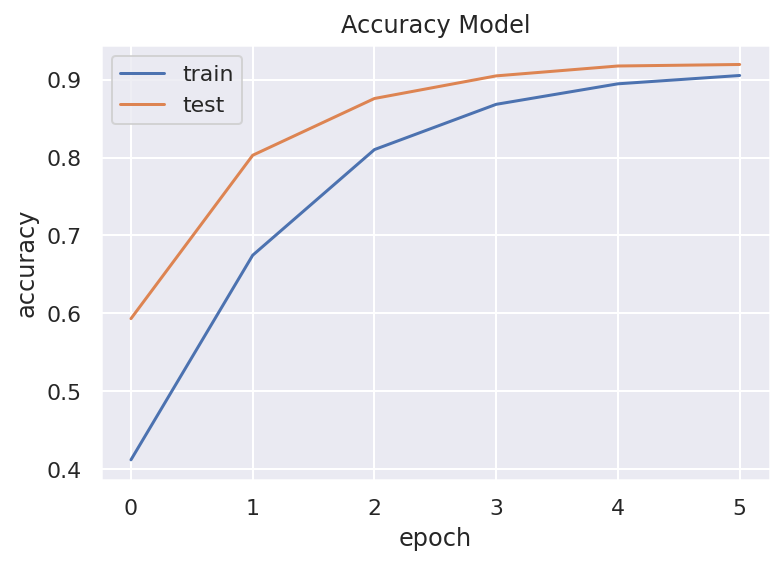

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

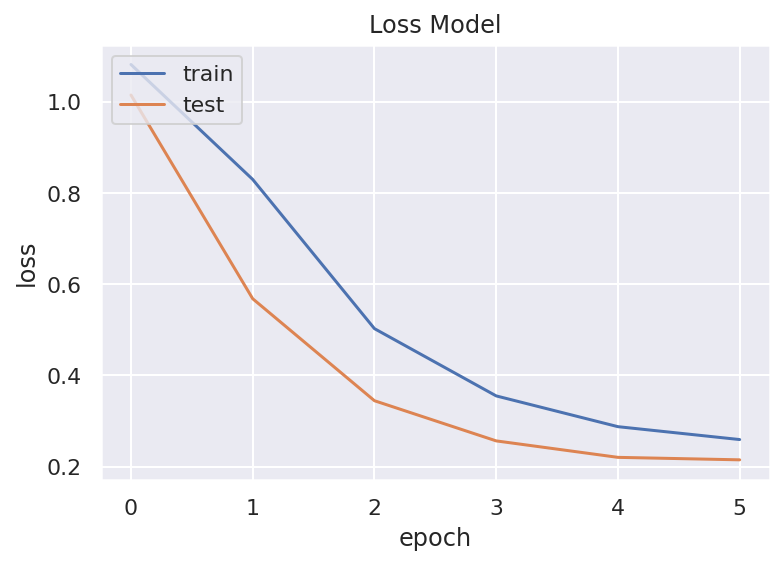

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()